# Climate Change Belief Analysis 2022 - Team ZF2

© Explore Data Science Academy

---

###### Team Members

1. Abubakar Abdulkadir
2. Joseph Mugo
3. Philip Ogunmola
4. Rogers Mugambi
5. Adewale Nana
6. Philip Wambua

---

## Overview

<img src="images/climate.jpg"/>

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, this notebook provides a walthrough the creation of a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

---

## Table of Contents     <a id="content"></a>

<a href=#1>1. Problem Statement </a>

<a href=#1>2. Packages </a>

<a href=#2>3. Loading Data</a>

<a href=#4>4. Exploratory Data Analysis (EDA)</a>

<a href=#5>5. Data Cleaning and Engineering</a>

<a href=#6>6. Modeling</a>

<a href=#7>7. Model Performance </a>

<a href=#8>8. Model Explanation </a>

<a href=#9>9. Model Deployment </a>

## 1.0 Problem Statement

To build a robust Machine Learning Model that will be able to predict a person’s belief in Climate Change based on their tweet data, allowing companies to gain access into customer sentiment. <br ><br>

## 2.0 Packages

### 2.1. Installing Packages

Aside the popular libraries for Machine learning like sklearn, pandas, matplotlib  and numpy, other libraries were used to provide different useful functionality to aid in the development of this project.

In [ ]:
!pip install comet_ml 
!pip install langdetect
!pip install imblearn
!pip install nltk

- <a href="https://www.comet.ml/"> comet</a> was used in this project to improve collaboration and control version by means of keeping track of all the stages of our project and using its registry as a source of secure storage. <br><br>

- <a href="https://pypi.org/project/langdetect/"> langdetect</a>  was used for detecting words in tweets which does not belong to the language of choice for this project; English. It can recognize about 55 languages. <br><br>

- <a href="https://imbalanced-learn.org"> imblearn</a> was used to generate synthetic data for handling the class imbalance in the tweet sentiment. <br><br>

- <a href="https://www.nltk.org"> nltk</a> was used for Natural language progressing. It contains methods which allows us to manipulate human language using python

### 2.2 Importing Packages 

In [2]:
# Data loading and Text processing
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

#Resampling techniques
from collections import Counter 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

<br />

## 3.0 Loading Data

    

For this project, Pandas library will be used to access and manipulate the datasets. Hence, The training and testing datasets are loaded from the `train` and `test_with_no_labels` csv files into df_train and df_test variables respectively using the pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html"> read_csv</a> method. The read_csv method returns a <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html"> dataframe</a>.

In [85]:
# read train dataset
df_train = pd.read_csv('data/train.csv')

# read test dataset
df_test = pd.read_csv('data/test_with_no_labels.csv')

<br><br>
## 4.0 Exploratory Data Analysis


Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Primarily, EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.This approach for data analysis uses many tools(mainly graphical to maximize insight into a data set, extract important variables, detect outliers and anomalies, amongst other details that is missed when looking at DataFrame. This step is very important especially when we model the data in order to apply Machine Learning techniques.

### Comet 

* Install Comet
* Import Experiment from Comet
* Create an experiment instance

In [12]:
from comet_ml import Experiment

In [ ]:
# # Create an experiment with the comet generated api key:
# experiment = Experiment(
#     api_key="<API key here>",
#     project_name="team_zf2_classification",
#     workspace="pheelog", # I will suggest we use Joe Mugo comet username here
# )

### Packages 

In [55]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

# imports for Natural Language  Processing
import re
import os
import nltk
import string
import time
# import fasttext
import spacy.cli
from langdetect import detect
import contractions
import unicodedata
import numpy as np
import pandas as pd
# import xgboost
from sklearn import metrics
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')

# Classification Models

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Performance Evaluation
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import library for train test split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

#Resampling techniques
from collections import Counter 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

#spacy
spacy.cli.download('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### 4.1 Overview of the Training Dataset

In [9]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


To have a quick overview of the dataset, the pandas<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head"> DataFrame.head </a> method was used to display the first five rows of the train dataset. It is immediately obvious that the dataset contains two predictors; message and tweetid with a target variable; sentiment. The message field also contains common tweet characters like # and @ tags.
<br /><br />

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


A little more exploration with the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html"> DataFrame.info </a> method reveals that the dataset contains 15,819 entries with no null values. Hence, the shape of the dataset can be deduced to be (15819, 3) <br /><br />

**Observations:**
* The train datasets contains one categorical column called 'message'
* The train dataset contains three columns; one categorical - 'message' and two numerical - 'sentiment and 'tweetid
* Some tweets contain twitter handles (e.g @RawStory), numbers (e.g year 2016), hashtags (e.g #TodayinMaker# WIRED) and re-tweets (RT).
* Some tweets contain names of ogarnisations, continents and countries.
* New lines are represented by '\n' in the tweet string.

### 4.2 Analysis  of the Sentiments

#### 4.2.1 Sentiment Distribution

In [5]:
# Count occurence of each class in training dataset
category_counts = df_train['sentiment'].value_counts()
category_counts

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

There are four distinct Class labels present in the train data. Hence the the problem is a multi-class classification problem. 
  
        Label   Sentiments    Description
         2	   News:         the tweet link to factual news about climate change
         1       Pro:          the tweet supports the belief of man-made climate change
         0	   Neutral:      the tweet neither supports nor refutes the belief of man-made climate change
        -1       Anti:         the tweet does not believe in man-made climate change

#### 4.2.2 Sentiment Distribution (Visual Representation)

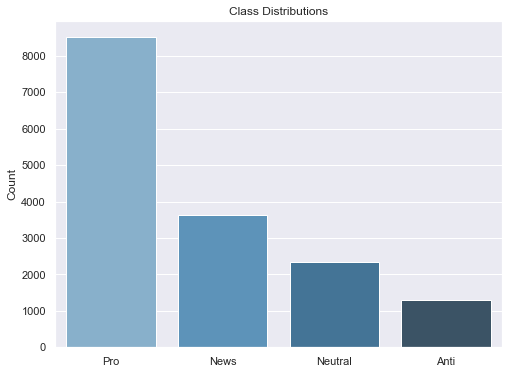

In [17]:
'''
    Calculate the number of tweets per Sentiment 
    and plot the class distributions results
'''

fig, ax = plt.subplots(figsize = (8, 6))
target =df_train['sentiment'].value_counts()
sns.barplot(x=['Pro', 'News', 'Neutral', 'Anti'], y=target, ax=ax, palette="Blues_d")
plt.title('Class Distributions')
plt.ylabel("Count")
plt.show()

**Observations:**
* The sum of the tweets relating to news,neutral and anti is less than half of the total tweets.
* The distribution indicates that there is a class imbalance in the train dataset. The effect of this imbalance, if not attended to, is a model which performs very well at categorising samples of a particular category and fails at others. For an instance, a model built on this train data will perform well in categorising tweets which supports man-made climate change (Pro) but performs way lesser at classifying the Anti tweets.
* The training dataset is skewed to the Pro sentiment category indicating a strong support for the belief of man-made climate change. <br><br>

### 4.3 Analysis  of the Message feature

From the overview of the data carried out prior, there are two features in the dataset; the message and tweetId features. The tweeteId is numerical while the message is object. The tweetid feature contains unique value for all samples. Hence will not be very useful for modelling. It will be beter off being dropped or being converted to the dataset index. This section contains an exploration of the message feature.

#### 4.3.1 Unique Words

In [19]:
 def create_bank_set(dataset, word="", category=""):
    '''
        Creates a list of all the words or characters in the message feature
        
        Input:
            dataset - The dataset to extract words or characters from
            category - Filters the dataset by the specified category
            type - Specifies the level of extraction; wether characters or words
        
        Output:
            pandas DataFrame of all the characters or words of the specified category 
    '''
    corpus = []
    if category:
        df = dataset[dataset['sentiment'] == category]['message']
    else:
        df = dataset['message']
    
    if word:
        bank = []
        for row in df:
            bank.extend(row.split(" "))
    else:
        bank = [row[x] for row in df for x in range(len(row))]
        
    return pd.DataFrame(bank)

<br />
Using the create_bank_set function to create a word bank for the entire train dataset

In [20]:
words = create_bank_set(df_train, word=True)
total_words = len(words[0])
count_unique = len(words[0].unique())
print("Total words: {} \nUnique words: {}".format(total_words, count_unique))

Total words: 278862 
Unique words: 47968


There are about 48,000 total words in the unprocessed train dataset. Considering that there are 15,819 total number of tweets, it can be deduced that each tweet will only contain on the average 47,968 / 15,189 = 3.158 unique word.

#### 4.3.2 Words Popularity

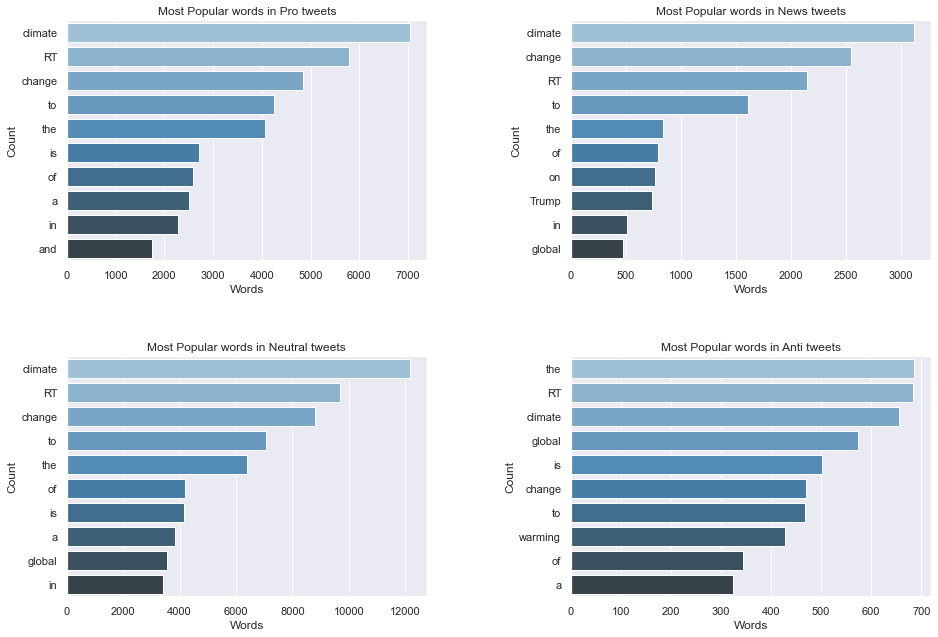

In [26]:
# Distribution of words per Class
fig, ax = plt.subplots(2,2, figsize=(15,10))
categories = [1, 2, 0, -1]
labels = ['Pro', 'News', 'Neutral', 'Anti']

pos_x = 0
pos_y = 0 

for i, category in enumerate(categories):
    if i > 1:
        pos_x = 1
        
    pos_y = i % 2
    
    data = create_bank_set(df_train, word=True, category=category)
    data = data[0].value_counts().head(10)
    sns.barplot(x=data, y=data.index, ax=ax[pos_x][pos_y], palette="Blues_d")
    ax[pos_x][pos_y].set_ylabel("Count")
    ax[pos_x][pos_y].set_title("Most Popular words in " + str(labels[i]) + " tweets")
    ax[pos_x][pos_y].set_xlabel("Words")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

The graphs above showcase the evidence of noise. A lot of stop words are picked up as being important which include: (the, to, and, also of). Also, in the graph labeled popular for news tweets, there is a punctuation (a dash -) picked up as an important word. 

<a href="https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47"> Stop words </a> are very common words that don’t have a lot of meaning or words that can be safely ignored without sacrificing the meaning of a text like this, that, or etc. From the above distribution, in addition to the obvious stop words, tweets from the different classes appear to contain similar wordings like Climate, change, RT, and global. These words usually will not be considered as stop words but in this case, since they appear the most frequent in almost all the categories, they will behave more like stop words, providing little or no information to our model. Hence, a consideration to drop such common words. <br /><br />

#### 4.3.2 Mention Analysis

A mention is a tweet that contains another person's username anywhere in the body of the tweet. We collect these messages, as well as all the replies including mentions of multiple usernames in a tweet. All those mentioned will see any tweet in which they are mentioned.

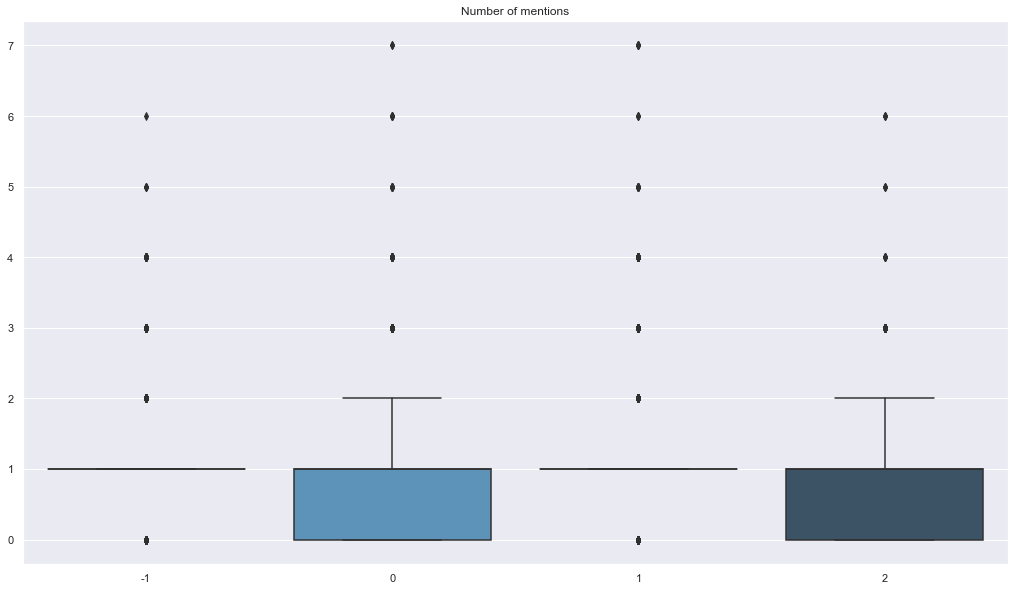

In [46]:
"""calculate the number of mentions for each sentiment in a tweet"""

train1 = df_train.copy()
# mention count 
train1['mentions'] = df_train['message'].apply(lambda x: len([i for i in str(x) if i == '@']))

#plot the number of mentions
plt.subplot(1,3,3)
sns.boxplot(y='mentions', x='sentiment', data=train1, palette="Blues_d")
plt.title('Number of mentions')
plt.ylabel('')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches(60, 10)

plt.show()

 **Observation:**

The Anti and pro setiments seem to have the most mentions per tweet; most of the tweets have atleast one mention as compared to the news and Neutral sentiment classes which have most tweets either having or not having a mention since their avarage mentions per tweet lies between 0.5. Although, expectations would have been that the news class will hold more mentions. 

#### 4.3.3. Hashtags Analysis

People use the hashtag symbol (#) before a relevant keyword or phrase in their Tweet to categorize those Tweets and help them show more easily in Twitter search. Clicking or tapping on a hashtagged word in any message shows you other Tweets that include that hashtag. Hashtags can be included anywhere in a Tweet

In [47]:
# Creating a function to extract hashtags from tweets

def extract_hashtags(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

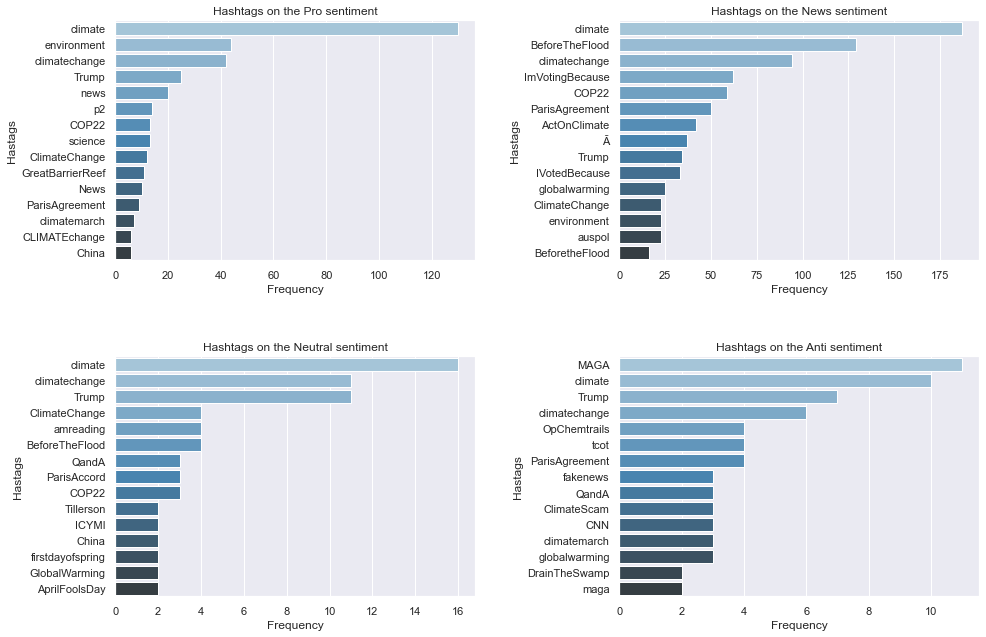

In [58]:
# Extracting hashtags from tweets
news_h = extract_hashtags(df_train['message']
                              [df_train['sentiment'] == 2])
pro_h = extract_hashtags(df_train['message']
                          [df_train['sentiment'] == 1])
neutral_h = extract_hashtags(df_train['message']
                              [df_train['sentiment'] == 0])
anti_h = extract_hashtags(df_train['message']
                          [df_train['sentiment'] == -1])

# hashtag list
hashtags = [sum(news_h, []), sum(pro_h, []),
            sum(neutral_h, []),sum(anti_h, [])]
            
# Distribution of words per Class
fig, ax = plt.subplots(2,2, figsize=(15,10))
categories = [1, 2, 0, -1]
labels = ['Pro', 'News', 'Neutral', 'Anti']

pos_x = 0
pos_y = 0 

for i, sent in enumerate(hashtags):
    if i > 1:
        pos_x = 1
        
    pos_y = i % 2
            
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Hashtag': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)
            
    sns.barplot(data=df, y='Hashtag', x='Count', palette="Blues_d", ax=ax[pos_x][pos_y])
    ax[pos_x][pos_y].set_ylabel("Hastags")
    ax[pos_x][pos_y].set_title("Hashtags on the " + labels[i] + " sentiment")
    ax[pos_x][pos_y].set_xlabel("Frequency")
    
    
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

**Observation:**

* We can see that the top 5 hashtags have similar words like Climate, climate change, Trump and Before the flood
* Before the flood is a popular hashtags used in pro climate change tweets, this refers to a 2016 documentary where actor Leonardo DiCaprio meets with scientists, activists and world leaders to discuss the dangers of climate change and possible solutions.
* In the anti climate change tweets MAGA (Make America great again) is the top popular hashtag. It is a slogan that was often used by Donald Trump during his campaign for elections in 2016. This soon became a trending hashtag to use to show support for Donald Trump., 

#### 4.3.4. Retweets Analysis

Another very popular words in all the classes is the RT which stands for retweet. Twitter allows a user to retweet, or RT another users tweets. This is great for creating trends, but not useful for sentiment analysis. Now we will remove the duplicates to get a clearer picture of our data set. <br><br>

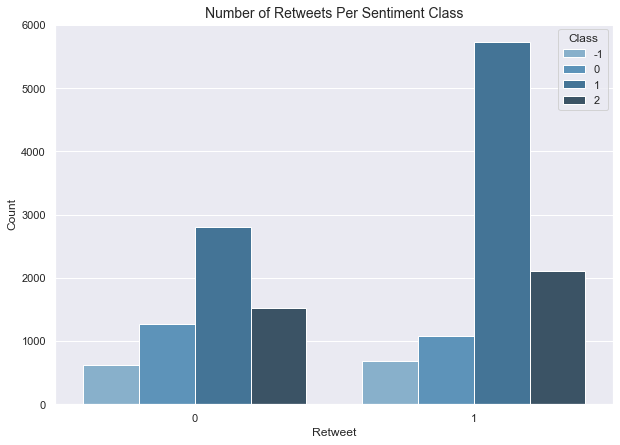

In [59]:
# Class distribution for set of retweeted-tweets and set without retweets
plt.figure(figsize = (10,7))
train1['retweet'] = train1['message'].apply(lambda tweet: 1 if tweet.startswith('RT @') else 0)
sns.countplot(x='retweet', data=train1, palette='Blues_d', hue='sentiment')
plt.title('Number of Retweets Per Sentiment Class',fontsize=14)
plt.xlabel('Retweet')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

**Observations:**

* The pro sentiment has about 6000 retweets as compared to the about its 3000 tweets. The retweets are twice the number of tweets

* Other class have the retweet almost equal to the number of actual tweets

* This indicates a relative higher support ratio for the pro sentiment

#### 4.3.5. URL Analysis

There are also URL related words occuring frequently as indicated by the distribution of words. This section seeks to explore if links are more peculiar to some classes than others.<br><br>

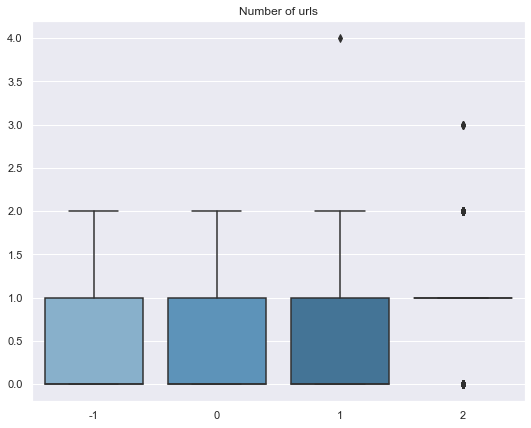

In [65]:
# extracting urls
train1['urls'] = train1['message'].apply(lambda x: len([i for i in x.lower().split() if 'http' in i or 'https' in i]))

# ploting the number of urls
plt.subplot(1,3,3)
sns.boxplot(y='urls', x='sentiment', data=train1, palette="Blues_d")
plt.title('Number of urls')
plt.ylabel('')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches( 30, 7)

plt.show()

**Observation**:
There is not much difference between the number of urls in each setiment. Although, as expected, most tweets in the pro sentiment contain atleast a link while the other classes either have or do not. Generally, links can not be attributed to a particular sentiment.

#### 4.3.5. Twitter Handles Analysis

A Twitter handle is the username that appears at the end of your unique Twitter URL. Twitter handles appear after the @ sign in your profile URL and it must be unique to your account. A Twitter name, on the other hand, is simply there to help people find the company they're looking for.

In [67]:
# Creating a function to extract handles from tweets
def extract_handles(x):
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

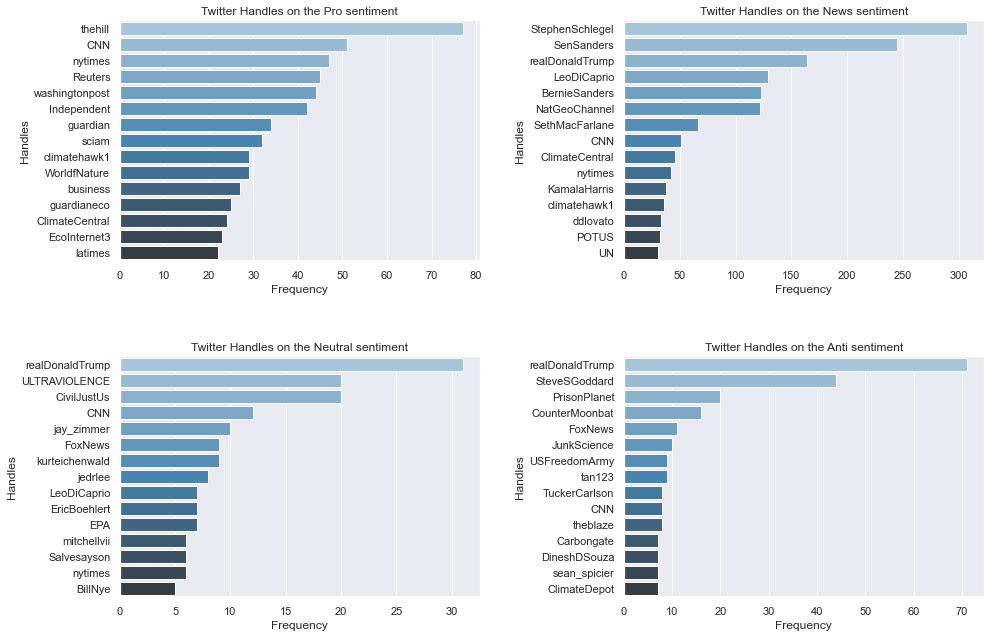

In [77]:
# Extracting handles from tweets
news_h = extract_handles(df_train['message']
                              [df_train['sentiment'] == 2])
pro_h = extract_handles(df_train['message']
                          [df_train['sentiment'] == 1])
neutral_h = extract_handles(df_train['message']
                              [df_train['sentiment'] == 0])
anti_h = extract_handles(df_train['message']
                          [df_train['sentiment'] == -1])

# handle lists 
handles = [sum(news_h, []), sum(pro_h, []), sum(neutral_h, []),
           sum(anti_h, [])]

# Distribution of words per Class
fig, ax = plt.subplots(2,2, figsize=(15,10))
categories = [1, 2, 0, -1]
labels = ['Pro', 'News', 'Neutral', 'Anti']

pos_x = 0
pos_y = 0 

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(handles):
    if i > 1:
        pos_x = 1
        
    pos_y = i % 2
   
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    sns.barplot(data=df, y='Handle', x='Count', palette='Blues_d', ax=ax[pos_x][pos_y])
    ax[pos_x][pos_y].set_ylabel("Handles")
    ax[pos_x][pos_y].set_title("Twitter Handles on the " + labels[i] + " sentiment")
    ax[pos_x][pos_y].set_xlabel("Frequency")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

**Observations**

From the Visuals above we can all that ...
* The most popular News handles are actual news broadcaster accounts
* The most popular Pro handles seem to be celebrity accounts & news accounts.
* Trump features most for most popular Anti & Neutral tweets.

## 5.0 Data Cleaning and Engineering


In this section, the recommendations from the exploratory data analysis phase is implemented. The dataset was cleaned and features engineered from the message field.

### 5.1 Text Cleaning

The dataset contains punctuations, links, emojis and twitter specific characters like @ and # symbols. Words also exist in different cases which models might translate and different. Hence, the proceeding function performs cleaning by:
- Changing the Case of the words
- Remove punctuations
- Remove links
- Remove emojis

In [86]:
def clean_data(text):
    # change the case of all the words in the text to lowercase 
    text = text.lower()
    
    # Remove links from the text
    url = re.compile(r'https?://\S+|www\.\S+')
    text =  url.sub(r'', text)
    
    # remove punctuation
    text = "".join([x for x in text if x not in string.punctuation])
    
    # Remove Emojis - Emoji Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    '''# Correct mispelt word
    spelling = SpellChecker()
    correct_text = []
    misspelt_words = spelling.unknown(text.split())
    for word in text.split():
        if word in misspelt_words:
            correct_text.append(spelling.correction(word))
        else:
            correct_text.append(word)
    text = " ".join(correct_text)'''
    
    return text

The clean_data function accepts a row of text and returns a string with the punctuations, emojis and links removed including changing the case and correcting misspelt words. <br><br>  

In [88]:
# Clean the train dataset
df_train['message'] = df_train['message'].apply(clean_data)

# Clean the test dataset
df_test['message'] = df_test['message'].apply(clean_data)

df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954


### 4.2 Drop TweetId feature

The tweetId feature contains unique values across the feature. Hence, it will contribute little or nothing to the accuracy of the model. While weighing down the model in terms of computational cost.

In [80]:
def drop_unwanted(dataframe, unwanted_features):
    df = dataframe.drop(unwanted_features,  axis='columns')
    return df

In [89]:
# drop tweetid from train dataset
df_train = drop_unwanted(df_train, ['tweetid'])

# Reserve tweetid for prediction
test_tweet_id = df_test['tweetid']

# drop tweetid from test dataset
df_test = drop_unwanted(df_test, ['tweetid'])

# view snapshot
df_train.head()

,sentiment,message
0,1,polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...
2,2,rt rawstory researchers say we have three year...
3,1,todayinmaker wired 2016 was a pivotal year in...
4,1,rt soynoviodetodas its 2016 and a racist sexis...


### 4.3 Text Tokenization

In this section, the message feature was tokenized (each message was broken down into list of words) using the nltk RegexTokenizer.

In [82]:
def tokenize_data(text):
    tokenizer = tokenize.RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

The function above takes a row of text and return a list of each word in the text. <br /><br />

In [90]:
# Tokenize the train dataset
df_train['message'] = df_train['message'].apply(tokenize_data)

# Tokenize the test dataset
df_test['message'] = df_test['message'].apply(tokenize_data)

df_train['message'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [its, not, like, we, lack, evidence, of, anthr...
2    [rt, rawstory, researchers, say, we, have, thr...
3    [todayinmaker, wired, 2016, was, a, pivotal, y...
4    [rt, soynoviodetodas, its, 2016, and, a, racis...
Name: message, dtype: object

### 4.4 Stop words Removal

Stop words from the message feature are removed using the defined function remove_stop_words. <br ><br >

In [91]:
def remove_stop_words(list_of_words):
    # The function takes a list of words and filter out the stop words
    words = [word for word in list_of_words if word not in stopwords.words('english')]
    return words

In [ ]:
# Remove stop words from train dataset
df_train['message'] = df_train['message'].apply(remove_stop_words)

# Remove stop words from test dataset
df_test['message'] = df_test['message'].apply(remove_stop_words)

### 4.5 Lemmatization 

English words have different variants. cats and cat are variants of cat. Lemmatization will ensure that all variants of a word map to the same root word. ALthough, an alternative to lemmatization is stemming. Stemming will remove the suffix of words and does not necessarily return English words. Hence, Lematization is preffered in this instance.

In [ ]:
def lemmatize_words(list_of_words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(x) for x in list_of_words]

In [ ]:
# lemmatize train set
df_train['message'] = df_train['message'].apply(lemmatize_words)

# lemmatize test set
df_test['message'] = df_test['message'].apply(lemmatize_words)

After the lemmatization, we join the tokenized words together. This is to enable us create features from the field.

In [ ]:
#Join all the words in the message field
df_train['message'] = df_train['message'].apply(lambda x: " ".join(x))
df_test['message'] = df_test['message'].apply(lambda x: " ".join(x))

### 4.6 Features Extraction 

To create a model, there is a need to have a set of feature(s) and target. Most models only accept numerical values for feature sets. For this project, our feature is a string of words. Hence there is a need to create vectors of digits from these words. The process is called Vectorization.

For this project we define a vectorizer with the following tuning
- stop_words = 'english'
- ngram_range = (1, 4)
- max_df = 0.7
- min_df = 1

In [387]:
def vectorize_data(train, test):
    vectorizer = TfidfVectorizer(stop_words='english',
                                 min_df=1,
                                 ngram_range=(1, 2),
                                 max_df = 0.5)
    train_data = vectorizer.fit_transform(train)
    test_data = vectorizer.transform(test)
    return train_data, test_data

In [388]:
#vectorize the train and test dataset
train_data, test_data = vectorize_data(df_train['message'], df_test['message'])

### 4.6 Spliting Train Dataset 

To properly access a model, we need to access the model on data which it has not seen before. Hence, there is a need to split the training dataset into two different datasets; the training dataset - which will be used to train a model and the validation set - which will be used to measure the performance of the model. 

In [371]:
train_x, validation_x, train_y, validation_y = train_test_split(train_data, df_train['sentiment'], test_size=0.2,  random_state=20)

In [372]:
print(train_x.shape)
print(validation_x.shape)
print(train_y.shape)
print(validation_y.shape)

(12655, 105665)
(3164, 105665)
(12655,)
(3164,)


## 5.0 Modeling and Evaluation

<a href=#content>Back to Table of Contents</a>

    
| Description |
| :--------------------------- |
| In this section, several models are trained and evaluated.|

---

#### 5.1 Ridge Classifier Model

In [373]:
ridge_model = RidgeClassifier()
ridge_model.fit(train_x, train_y)
predictions = ridge_model.predict(validation_x)

In [374]:
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.93      0.36      0.52       272
      1: Pro       0.72      0.31      0.44       477
  0: Neutral       0.72      0.93      0.81      1726
    -1: Anti       0.79      0.71      0.75       689

    accuracy                           0.74      3164
   macro avg       0.79      0.58      0.63      3164
weighted avg       0.75      0.74      0.72      3164



#### 5.2 Random Forest Classifier Model

In [342]:
tree_model = RandomForestClassifier(random_state=50)
tree_model.fit(train_x, train_y)
predictions = tree_model.predict(validation_x)


KeyboardInterrupt



In [ ]:
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

#### 5.3 Nearest Neighbour Classifier

In [36]:
knn_model = KNeighborsClassifier(3)
knn_model.fit(train_x, train_y)
predictions = knn_model.predict(validation_x)
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.37      0.43      0.40       272
      1: Pro       0.39      0.35      0.37       477
  0: Neutral       0.74      0.70      0.72      1726
    -1: Anti       0.58      0.67      0.62       689

    accuracy                           0.62      3164
   macro avg       0.52      0.54      0.53      3164
weighted avg       0.62      0.62      0.62      3164



#### 5.4 Support Vector Classifier

In [37]:
svc_model = SVC(gamma=2, C=1)
svc_model.fit(train_x, train_y)
predictions = svc_model.predict(validation_x)
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.95      0.14      0.25       272
      1: Pro       0.88      0.16      0.27       477
  0: Neutral       0.64      0.98      0.77      1726
    -1: Anti       0.89      0.50      0.64       689

    accuracy                           0.68      3164
   macro avg       0.84      0.44      0.48      3164
weighted avg       0.75      0.68      0.62      3164



#### 5.5 AdaBoost Classifier

In [38]:
ada_model = AdaBoostClassifier()
ada_model.fit(train_x, train_y)
predictions = ada_model.predict(validation_x)
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.54      0.25      0.34       272
      1: Pro       0.46      0.29      0.35       477
  0: Neutral       0.62      0.84      0.72      1726
    -1: Anti       0.61      0.36      0.45       689

    accuracy                           0.60      3164
   macro avg       0.56      0.43      0.47      3164
weighted avg       0.59      0.60      0.57      3164



In [39]:
bayes_model = MultinomialNB()
bayes_model.fit(train_x, train_y)
predictions = bayes_model.predict(validation_x)
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       1.00      0.01      0.01       272
      1: Pro       1.00      0.08      0.14       477
  0: Neutral       0.61      0.98      0.75      1726
    -1: Anti       0.87      0.42      0.57       689

    accuracy                           0.64      3164
   macro avg       0.87      0.37      0.37      3164
weighted avg       0.76      0.64      0.56      3164



In [244]:
sgdc_model = SGDClassifier()
sgdc_model.fit(train_x, train_y)
predictions = sgdc_model.predict(validation_x)
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.79      0.42      0.54       272
      1: Pro       0.66      0.39      0.49       477
  0: Neutral       0.75      0.89      0.81      1726
    -1: Anti       0.73      0.72      0.73       689

    accuracy                           0.74      3164
   macro avg       0.73      0.60      0.64      3164
weighted avg       0.73      0.74      0.72      3164



In [367]:
final_ridge_model = RidgeClassifier()
final_ridge_model.fit(train_data, df_train['sentiment'])
predictions = final_ridge_model.predict(test_data)

In [368]:
submission = pd.DataFrame({'tweetid': test_tweet_id, 'sentiment':predictions})
submission.to_csv('submission.csv', index=False)

predictions.shape

(10546,)